# Data loading

In [1]:
print("Hello Jupyter")


Hello Jupyter


In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

numpy: 2.2.6
pandas: 2.3.1
matplotlib: 3.10.5
seaborn: 0.13.2


In [5]:

df = pd.read_csv("mesa_agent_results.csv")
df.head()


,step,agent_id,agent_type,room,current_temp,comfort_level,using_ac,preferred_temp,action
0,0,10,student,East Zone,45.57,20.03,True,25.55,NaN
1,0,29,student,West Zone,23.04,2.84,False,25.88,NaN
2,0,72,student,East Zone,45.57,20.04,True,25.53,NaN
3,0,23,student,East Zone,45.57,21.52,True,24.05,NaN
4,0,39,student,West Zone,23.04,1.65,False,24.69,NaN


In [6]:
df.isnull().sum()

step                   0
agent_id               0
agent_type             0
room                   0
current_temp           0
comfort_level       1600
using_ac            1600
preferred_temp         0
action            112000
dtype: int64

In [7]:
df['comfort_level'] = df['comfort_level'].fillna(0)

In [8]:
df.dtypes

step                int64
agent_id            int64
agent_type         object
room               object
current_temp      float64
comfort_level     float64
using_ac           object
preferred_temp    float64
action             object
dtype: object

In [9]:
df.describe()

,step,agent_id,current_temp,comfort_level,preferred_temp
count,113600.000000,113600.000000,113600.000000,113600.000000,113600.000000
mean,99.500000,70.500000,34.476918,10.777948,25.271180
std,57.734559,40.991033,11.609800,10.015239,0.816184
min,0.000000,0.000000,23.000000,0.000000,24.000000
25%,49.750000,35.000000,23.600000,1.460000,24.667500
50%,99.500000,70.500000,24.020000,2.990000,25.190000
75%,149.250000,106.000000,46.400000,21.130000,25.750000
max,199.000000,141.000000,50.310000,26.310000,27.920000


# Analysis

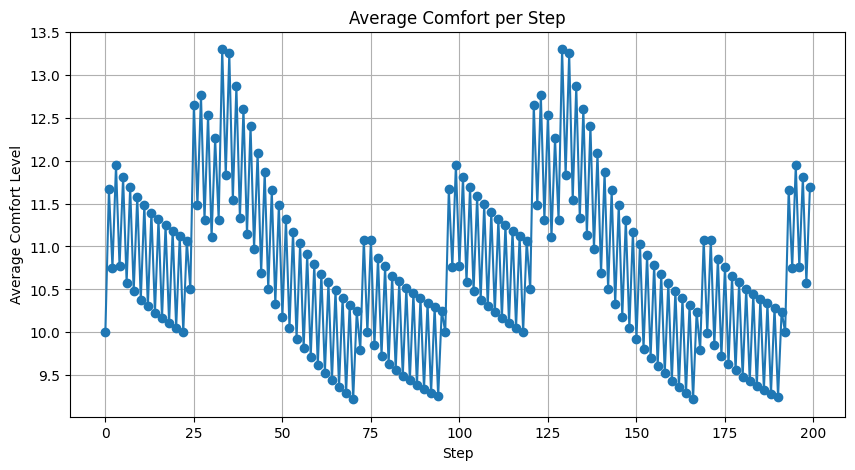

In [10]:
avg_comfort = df.groupby("step")["comfort_level"].mean()
plt.figure(figsize=(10,5))
plt.plot(avg_comfort.index, avg_comfort.values, marker="o")
plt.xlabel("Step")
plt.ylabel("Average Comfort Level")
plt.title("Average Comfort per Step")
plt.grid(True)
plt.show()


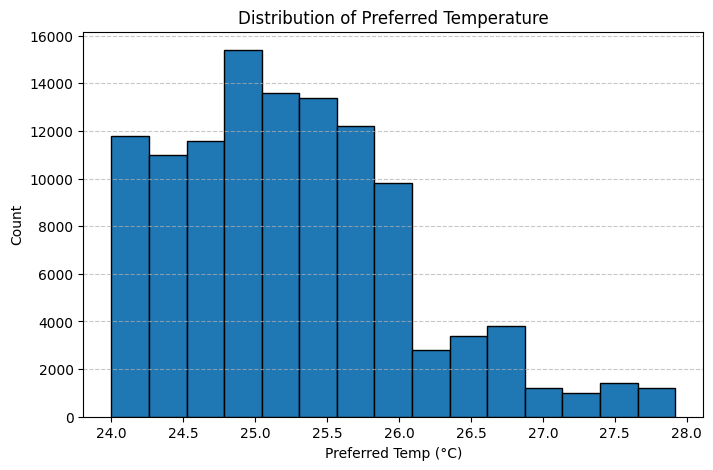

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df["preferred_temp"].to_numpy(), bins=15, edgecolor="black")
plt.xlabel("Preferred Temp (°C)")
plt.ylabel("Count")
plt.title("Distribution of Preferred Temperature")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<Figure size 800x500 with 0 Axes>

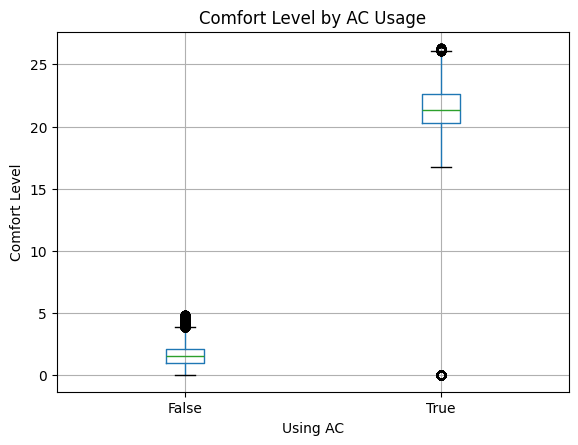

In [12]:
plt.figure(figsize=(8,5))
df.boxplot(column="comfort_level", by="using_ac")
plt.title("Comfort Level by AC Usage")
plt.suptitle("")
plt.xlabel("Using AC")
plt.ylabel("Comfort Level")
plt.show()


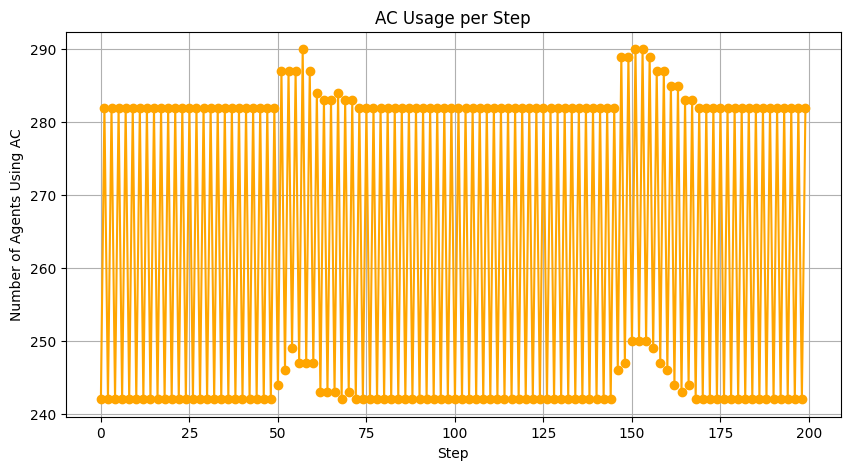

In [13]:
ac_usage = df.groupby("step")["using_ac"].sum()  # จำนวน agent ที่เปิด AC
plt.figure(figsize=(10,5))
plt.plot(ac_usage.index, ac_usage.values, marker="o", color="orange")
plt.xlabel("Step")
plt.ylabel("Number of Agents Using AC")
plt.title("AC Usage per Step")
plt.grid(True)
plt.show()
